# About
Extreme Value Theory tells us that `max(n_pareto_samples)` follows a Fréchet distribution when the number of samples `n` is large.

In this notebook I plot the ratio of exact distribution vs. a Fréchet distribution fit. 

The resulting plot shows us a 1:1 ratio for large `n` indicating equivalence for practical purposes.

##### Permalink
[Click here](https://github.com/FergM/fattails/blob/main/notebooks/NB35%20-%20Distribution%20of%20the%20Sample%20Max.ipynb) for latest version of this notebook.

##### Context
SCFT Book:
* Chapter 9: Extreme Value Theory
* This is basically a replication of figure 9.2 from *Statistical Consequences of Fat Tails*.
* However here I plot the ratio of PDFs instead of the ratio of CDFs. Both ratios show a similar picture.

Wikipedia Links:
* [Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
* [Frechet Distribution](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
* [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution)

In [1]:
import numpy as np
import pandas as pd

### Functions

In [2]:
def pareto_max_pdf(x, n, alpha=2, L=1):
    """PDF of the maximum of n i.i.d. pareto observations.

    Calculates the probability density of observing x.
    Formula is broken into parts for readability.
    
    Parameters
    ----------
    x : float
        Value whose probability density we want to know
    n : int
        Number of observations. 
    L : float
        Minimum value possible
    alpha : float
        Pareto distribution Tail exponent
    
    
    Returns
    -------
    probability : float
        Probability density for observing x
        when other parameters are as specified.
    """
    
    left = alpha*n*(L/x)**alpha
 
    right = (1-(L/x)**alpha)**(n-1)
    
    probability = (left*right)/x
    
    return probability

In [3]:
def frechet_pdf(x, n, alpha=2, L=1):
    """Frechet PDF

    Calculates the probability density of observing x.
    Formula is broken into parts for readability.
    
    This is really a tailored frechet pdf adjusted
    in description to fit the problem at hand.
    
    Parameters
    ----------
    x : float
        Value whose probability density we want to know
    n : int
        Number of observations. 
    L : float
        Minimum value possible
    alpha : float
        Pareto distribution Tail exponent

    Returns
    -------
    probability : float
        Probability density for observing x
        when other parameters are as specified.
    """
    # See SCFT book for beta's definition
    beta = L*n**(1/alpha)

    left = alpha*beta**alpha
    mid = x**(-alpha-1)
    right = np.e**((beta**alpha)*(-x**-alpha))
    
    probability = left*mid*right

    return probability

In [4]:
def pdf_ratio(x, n, alpha=2, L=1):
    """Ratio of exact pareto pdf to frechet pdf."""
    ratio = pareto_max_pdf(x, n, alpha, L) / frechet_pdf(x, n, alpha, L)
    return ratio

### Check the Functions

In [5]:
# Set input values
x=5
n=100

alpha=2
L=1

In [6]:
frechet_pdf(x, n, alpha, L)

0.0293050222219747

In [7]:
pareto_max_pdf(x, n, alpha, L)

0.02811719893141599

In [8]:
pdf_ratio(x, n, alpha, L)

0.9594669036057578

# Create Data Tables

In [9]:
# Set sample sizes
sample_sizes = [1, 10, 100, 1_000]

In [10]:
# Create range of x values
x = range(1+1,50+1)  # x=1 is undefined so we start with x=2
index_df = pd.Series(x, name='x') \
       .to_frame() \
       .set_index('x')
index_df.tail(3)

""
x
48
49
50


In [11]:
# Pareto Max pdf for different sample sizes
pareto_max_df = index_df.copy()
for n in sample_sizes:
    pareto_max_df[f'pareto_max_n{n}'] = pareto_max_df.index.map( lambda x: pareto_max_pdf(x, n, alpha=2, L=1) )
    
pareto_max_df.head()

,pareto_max_n1,pareto_max_n10,pareto_max_n100,pareto_max_n1000
x,,,,
2,0.250000,0.187712,1.069067e-11,3.838328e-123
3,0.074074,0.256622,6.390966e-05,5.865382e-50
4,0.031250,0.174820,5.248152e-03,3.120004e-27
5,0.016000,0.110805,2.811720e-02,3.112302e-17
6,0.009259,0.071857,5.693313e-02,5.550783e-12


In [12]:
# Frechet pdf for different sample sizes
frechet_df = index_df.copy()
for n in sample_sizes:
    frechet_df[f'frechet_n{n}'] = frechet_df.index.map( lambda x: frechet_pdf(x, n, alpha=2, L=1) )

frechet_df.head()

,frechet_n1,frechet_n10,frechet_n100,frechet_n1000
x,,,,
2,0.194700,0.205212,3.471986e-10,6.672976e-107
3,0.066284,0.243847,1.107062e-04,4.118355e-47
4,0.029357,0.167269,6.032669e-03,2.246182e-26
5,0.015373,0.107251,2.930502e-02,6.797367e-17
6,0.009006,0.070136,5.757086e-02,7.995408e-12


In [13]:
# Ratios for different sample sizes
ratio_df = index_df.copy()
for n in sample_sizes:
    ratio_df[f'ratio_n{n}'] = ratio_df.index.map( lambda x: pdf_ratio(x, n, alpha=2, L=1) )
    
ratio_df.head()

,ratio_n1,ratio_n10,ratio_n100,ratio_n1000
x,,,,
2,1.284025,0.914719,0.030791,5.752049e-17
3,1.117519,1.052390,0.577291,1.424205e-03
4,1.064494,1.045143,0.869955,1.389026e-01
5,1.040811,1.033139,0.959467,4.578688e-01
6,1.028167,1.024536,0.988923,6.942464e-01


Show ratio data:

In [14]:
# ratio_df tail. Each column is for a different sample size
ratio_df.tail()

,ratio_n1,ratio_n10,ratio_n100,ratio_n1000
x,,,,
46,1.000473,1.000472,1.000462,1.000361
47,1.000453,1.000452,1.000443,1.000350
48,1.000434,1.000433,1.000425,1.000340
49,1.000417,1.000416,1.000408,1.000330
50,1.000400,1.000399,1.000392,1.000320


# Plots

Plot the ratio of *exact PDF/frechet PDF* for a power law (tail_alpha=2, min=1).

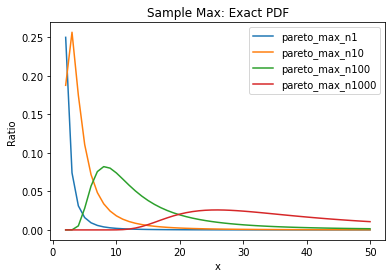

In [15]:
# Pareto Max
plot_kwargs = {'title':'Sample Max: Exact PDF',
               'ylabel':'Ratio'}

pareto_max_df.plot(**plot_kwargs);

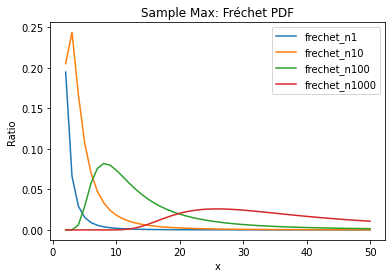

In [16]:
# Frechet
plot_kwargs = {'title':'Sample Max: Fréchet PDF',
               'ylabel':'Ratio'}

frechet_df.plot(**plot_kwargs);

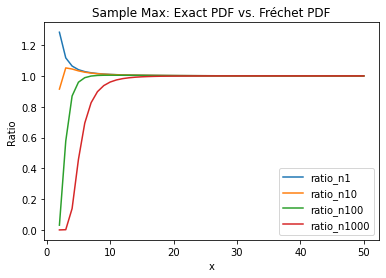

In [17]:
# Ratio
plot_kwargs = {'title':'Sample Max: Exact PDF vs. Fréchet PDF',
               'ylabel':'Ratio'}

ratio_df.plot(**plot_kwargs);